In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore')

In [40]:
df2=pd.read_csv('indian_liver.csv')

In [41]:
df2.head()

,age,gender,TB,DB,alkphos,sgpt,sgot,TP,ALB,A_G,class
0,65,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1.0
1,62,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1.0
2,62,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1.0
3,58,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1.0
4,72,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1.0


In [42]:
from sklearn.preprocessing import LabelEncoder

In [47]:
lb=LabelEncoder()
df2['gender']=lb.fit_transform(df2['gender'])

In [48]:
df2.head()

,age,gender,TB,DB,alkphos,sgpt,sgot,TP,ALB,A_G,class
0,65,0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1.0
1,62,1,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1.0
2,62,1,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1.0
3,58,1,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1.0
4,72,1,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1.0


In [49]:
df2.corr()

,age,gender,TB,DB,alkphos,sgpt,sgot,TP,ALB,A_G,class
age,1.000000,0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,0.026948,-0.137351
gender,0.056560,1.000000,0.089291,0.100436,-0.027496,0.082332,0.080336,-0.089121,-0.093799,0.049655,-0.082416
TB,0.011763,0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,0.032129,-0.220208
DB,0.007529,0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,0.034385,-0.246046
alkphos,0.080425,-0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,0.039139,-0.184866
sgpt,-0.086883,0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,0.027201,-0.163416
sgot,-0.019910,0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,0.020991,-0.151934
TP,-0.187461,-0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,-0.016607,0.035008
ALB,-0.265924,-0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,-0.050497,0.161388
A_G,0.026948,0.049655,0.032129,0.034385,0.039139,0.027201,0.020991,-0.016607,-0.050497,1.000000,-0.039254


In [51]:
dfa=df2.groupby('class')
dfa1=dfa.get_group(1)
dfa2=dfa.get_group(2)

In [52]:
from scipy.stats import ttest_ind,f_oneway,levene

In [57]:
df2.columns

Index(['age', 'gender', 'TB', 'DB', 'alkphos', 'sgpt', 'sgot', 'TP', 'ALB',
       'A_G', 'class'],
      dtype='object')

In [58]:
col=['age', 'gender', 'TB', 'DB', 'alkphos', 'sgpt', 'sgot', 'TP', 'ALB',
       'A_G']

In [87]:
res=[]
for i in col:
    t_statistic,p_value=ttest_ind(dfa1[i],dfa2[i])
    if p_value<0.05:
        res.append(p_value)
    #res.append(i) 
        print(i,(p_value))
    d=pd.Series(p_value,index=[i])
    
   
    

age 0.0008840631556261385
gender 0.046692526264183555
TB 7.801430929364345e-08
DB 1.7341026256990121e-09
alkphos 7.027486640526998e-06
sgpt 7.371781222193734e-05
sgot 0.00023139008403085087
TP 0.3988191275238614
ALB 9.074360842955469e-05
A_G 0.3440781162241686


In [110]:
f=pd.DataFrame({'ind':col,'value':res})
c=f[f['value']<0.05]

c1=list(c['ind'])
c1

['age', 'gender', 'TB', 'DB', 'alkphos', 'sgpt', 'sgot', 'ALB']

In [232]:
f

,ind,value
0,age,8.840632e-04
1,gender,4.669253e-02
2,TB,7.801431e-08
3,DB,1.734103e-09
4,alkphos,7.027487e-06
5,sgpt,7.371781e-05
6,sgot,2.313901e-04
7,TP,3.988191e-01
8,ALB,9.074361e-05
9,A_G,3.440781e-01


In [111]:
X=df2.drop('class',axis=1)

In [114]:
X1=X[c1]
y=df2['class']


,age,gender,TB,DB,alkphos,sgpt,sgot,ALB
0,65,0,0.7,0.1,187.0,16.0,18.0,3.3
1,62,1,10.9,5.5,699.0,64.0,100.0,3.2
2,62,1,7.3,4.1,490.0,60.0,68.0,3.3
3,58,1,1.0,0.4,182.0,14.0,20.0,3.4
4,72,1,3.9,2.0,195.0,27.0,59.0,2.4
...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500.0,20.0,34.0,1.6
579,40,1,0.6,0.1,98.0,35.0,31.0,3.2
580,52,1,0.8,0.2,245.0,48.0,49.0,3.2
581,31,1,1.3,0.5,184.0,29.0,32.0,3.4


In [119]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_sc=sc.fit_transform(X1)

In [115]:
models=[]


In [116]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [180]:
LR=LogisticRegression()
KNN=KNeighborsClassifier(n_neighbors=48, weights='distance')
DT=DecisionTreeClassifier(criterion='entropy',random_state=0,max_depth=5)
RF=RandomForestClassifier(criterion='entropy',n_estimators=4,random_state=0)
BG=BaggingClassifier(n_estimators=9,random_state=0)
AD=AdaBoostClassifier(n_estimators=7,random_state=0)
ADL=AdaBoostClassifier(base_estimator=LR,n_estimators=38,random_state=0)

In [185]:
models=[]
models.append(('Logistic', LogisticRegression()))
models.append(('Navie', GaussianNB()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=48, weights='distance')))
models.append(('DT', DecisionTreeClassifier(criterion='entropy',random_state=0,max_depth=5)))
models.append(('RF', RandomForestClassifier(criterion='entropy',n_estimators=4,random_state=0)))
models.append(('BG', BaggingClassifier(n_estimators=9,random_state=0)))
models.append(('ADA', AdaBoostClassifier(n_estimators=7,random_state=0)))
models.append(('ADAL', AdaBoostClassifier(base_estimator=LR,n_estimators=38,random_state=0)))
models.append(('St',stacked))

In [186]:
results=[]
names = []
for name,k in models:
    kfold=KFold(shuffle=True,n_splits=3,random_state=0)
   
    cv_results=cross_val_score(k,X_sc,y,cv=kfold,scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name,np.mean(cv_results),np.var(cv_results,ddof=1)))

Logistic: 0.749433 (0.000388)
Navie: 0.735214 (0.000285)
KNN: 0.715526 (0.003258)
DT: 0.650366 (0.001445)
RF: 0.634829 (0.000242)
BG: 0.687315 (0.000108)
ADA: 0.668402 (0.005949)
ADAL: 0.748530 (0.000533)
St: 0.748988 (0.001471)


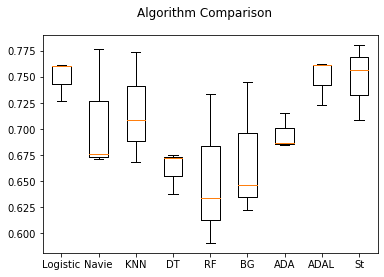

In [231]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [125]:
from sklearn.model_selection import GridSearchCV
knn=KNeighborsClassifier()
param={'n_neighbors':np.arange(1,50),'weights':['uniform','distance']}
GS=GridSearchCV(knn,param,cv=3,scoring='roc_auc')
GS.fit(X_sc,y)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [126]:
GS.best_params_ 

{'n_neighbors': 48, 'weights': 'distance'}

In [132]:
DT=DecisionTreeClassifier(random_state=0)
param={'criterion':['gini','entropy'],'max_depth':[2,5,10]}
GSD=GridSearchCV(DT,param,scoring='roc_auc')
GSD.fit(X_sc,y)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 5, 10]},
             pre_dispatc

In [133]:
GSD.best_params_ 

{'criterion': 'entropy', 'max_depth': 5}

In [136]:
RF_val=[]
for val in np.arange(1,50):
    RF=RandomForestClassifier(criterion='entropy',n_estimators=val,random_state=0)
    kfold=KFold(shuffle=True,n_splits=3,random_state=0)
    cv_results=cross_val_score(RF,X_sc,y,cv=kfold,scoring='roc_auc')
    RF_val.append(np.var(cv_results,ddof=1))
    print(val,np.var(cv_results,ddof=1))

1 0.0008760932685987577
2 9.290220283152591e-05
3 5.7485525562834215e-05
4 0.00024217916501303213
5 0.000896631093471508
6 0.0016351725333147646
7 0.0031197602811337327
8 0.004127254239540478
9 0.0035901494525617545
10 0.0032219465761368256
11 0.0026906456103996685
12 0.0027134231102606543
13 0.0021209449243300435
14 0.002310614380345673
15 0.00238097096584984
16 0.002344728626105449
17 0.002231928131077802
18 0.0017537970737186714
19 0.002027822008138553
20 0.002205725554964026
21 0.0020228772899099907
22 0.0020372120814684093
23 0.002076010515796898
24 0.002095078933074145
25 0.0019208177451455213
26 0.0023405757953140743
27 0.001888100026460315
28 0.0015497477982998002
29 0.0014775155861720467
30 0.0013743261111271061
31 0.001446930903722192
32 0.0016658439866021548
33 0.0016445738287795325
34 0.0017824418450033287
35 0.0018118688849626564
36 0.001703527185943468
37 0.0015289397262275674
38 0.0016803633811609154
39 0.001860139907567718
40 0.0018639752317351603
41 0.00192823576315648

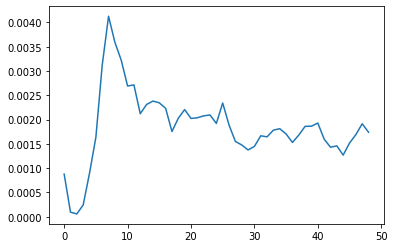

In [137]:
plt.plot(RF_val)

In [140]:
BG_val=[]
for val in np.arange(1,50):
    BG=BaggingClassifier(n_estimators=val,random_state=0)
    kfold=KFold(shuffle=True,n_splits=3,random_state=0)
    cv_results=cross_val_score(BG,X_sc,y,cv=kfold,scoring='roc_auc')
    BG_val.append(np.var(cv_results,ddof=1))
    print(val,np.var(cv_results,ddof=1))

1 0.0012505799874238967
2 0.0014547611385006382
3 9.662942999727795e-05
4 6.533707682817626e-05
5 0.0002960763544243721
6 0.0007779791144508072
7 0.000834269783311601
8 0.00028021861214800437
9 0.00010831657372144634
10 0.00030486034886951195
11 0.000407447935393594
12 0.00024230137178154714
13 8.34274599655104e-05
14 2.508829399120332e-05
15 0.00018817846804723172
16 0.00012773126663134573
17 4.928509676678926e-05
18 0.00010626041560281855
19 0.00015914742614051643
20 5.3751221649620676e-05
21 5.8975833186667456e-05
22 5.7292322501242826e-05
23 2.031089896974383e-05
24 9.009936119762523e-05
25 8.097461463479169e-05
26 0.0002967923316344829
27 0.00031915769365974806
28 0.00032966808381337955
29 0.0003086179835396359
30 0.00029068451742504176
31 0.00037527889833803747
32 0.00035610002399332884
33 0.0002946220398279671
34 0.00028890173388109407
35 0.0003142193145708373
36 0.0002762143196016005
37 0.00037209152858826757
38 0.0003455393166492404
39 0.0002824838507246244
40 0.00030542012612

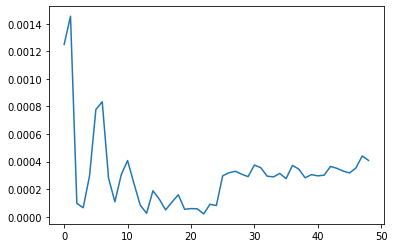

In [141]:
plt.plot(BG_val)

In [153]:
ADAL_val=[]
for val in np.arange(1,50):
    AD=AdaBoostClassifier(base_estimator=LR,n_estimators=val,random_state=0)
    kfold=KFold(shuffle=True,n_splits=3,random_state=0)
    cv_results=cross_val_score(AD,X_sc,y,cv=kfold,scoring='roc_auc')
    ADAL_val.append((1-np.mean(cv_results)))
    print(val,(1-np.mean(cv_results)))

1 0.2676118486094424
2 0.266593472412441
3 0.2658587501698929
4 0.2643856392775281
5 0.2633452493407308
6 0.26223434674704205
7 0.26140065974736304
8 0.2606103952415636
9 0.25959651115463445
10 0.25941728719256985
11 0.25816352986473656
12 0.25808177659638
13 0.2572118524949767
14 0.25661143765719074
15 0.25614354669236317
16 0.25571113050136285
17 0.2557884703307396
18 0.2556625475367923
19 0.2550440955074279
20 0.25438596606254515
21 0.2545560583820832
22 0.25411084414128815
23 0.25329474214623904
24 0.2536772287316277
25 0.2533569641595944
26 0.2532547065110511
27 0.25334035228015006
28 0.2533074080698382
29 0.25300555420523896
30 0.2533425246239954
31 0.25311778449529887
32 0.2525078644991309
33 0.2525483676174535
34 0.25236547724812064
35 0.2521397639942383
36 0.25178984810330585
37 0.25177899630388245
38 0.25147018314060243
39 0.25190245190922134
40 0.2516740453732563
41 0.2517112556001665
42 0.25144563883729154
43 0.2514377064134251
44 0.25165414060239943
45 0.2519684190009377
4

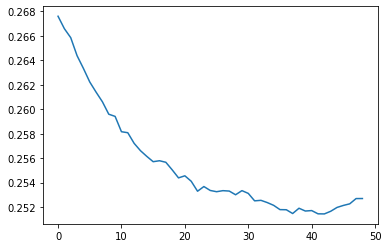

In [154]:
plt.plot(ADAL_val)

In [178]:
ADA_val=[]
for val in np.arange(1,50):
    AD=AdaBoostClassifier(n_estimators=val,random_state=0)
    kfold=KFold(shuffle=True,n_splits=3,random_state=0)
    cv_results=cross_val_score(AD,X_sc,y,cv=kfold,scoring='f1_weighted')
    ADA_val.append((1-np.mean(cv_results)))
    print(val,(1-np.mean(cv_results)))

1 0.40564366295157406
2 0.3878407155702269
3 0.3499903718352838
4 0.34224642126752514
5 0.3484473667314436
6 0.32337307753732214
7 0.31999247082879156
8 0.3353034119400391
9 0.33817271891443956
10 0.33191923788502653
11 0.32713109740327206
12 0.33936673254455585
13 0.348966222880151
14 0.33734058816274204
15 0.3418780588233006
16 0.34740901298893745
17 0.33731567974019305
18 0.3380487113806637
19 0.3410499510354216
20 0.33835143517336796
21 0.33558369951612466
22 0.3401296818615702
23 0.3371031970259869
24 0.3313883458560568
25 0.33624637226964904
26 0.3443123231587184
27 0.34599523187209347
28 0.34224131135655766
29 0.34539396082043716
30 0.33708053422414297
31 0.34251798738234507
32 0.33203498996641967
33 0.3342878518262219
34 0.3334214991562082
35 0.3342990308683632
36 0.33614633890322476
37 0.33519807897882814
38 0.33975301604942076
39 0.34238181314366845
40 0.34055094886157466
41 0.3463712142609606
42 0.3373750530072831
43 0.33873765882426987
44 0.33347578847596937
45 0.3365426758

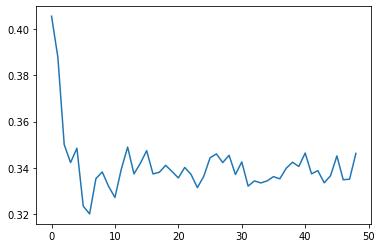

In [179]:
plt.plot(ADA_val)

In [158]:
from sklearn.model_selection import train_test_split

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.30, random_state=0)

In [161]:
LR1=LogisticRegression()

In [162]:
LR1.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [163]:
LR1.score(X_train,y_train)

0.7328431372549019

In [164]:
LR1.score(X_test,y_test)

0.7028571428571428

In [165]:
ADL1=AdaBoostClassifier(base_estimator=LR1,n_estimators=38,random_state=0)

In [167]:
ADL1.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                     dual=False,
                                                     fit_intercept=True,
                                                     intercept_scaling=1,
                                                     l1_ratio=None,
                                                     max_iter=100,
                                                     multi_class='warn',
                                                     n_jobs=None, penalty='l2',
                                                     random_state=None,
                                                     solver='warn', tol=0.0001,
                                                     verbose=0,
                                                     warm_start=False),
                   learning_rate=1.0, n_estimators=38, random_state=0)

In [168]:
ADL1.score(X_test,y_test)

0.7142857142857143

In [169]:
ADL1.score(X_train,y_train)

0.7450980392156863

In [171]:
RF1=RandomForestClassifier(criterion='entropy',n_estimators=4,random_state=0)

In [172]:
RF1.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=4,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [173]:
RF1.score(X_test,y_test)

0.68

In [174]:
RF1.score(X_train,y_train)

0.9387254901960784

In [183]:
from sklearn.ensemble import VotingClassifier

In [184]:
stacked=VotingClassifier(estimators=[('Logistic',LR),('KNN',KNN),('ADL',ADL)],voting='soft')

# USL

In [187]:
from sklearn.cluster import KMeans

In [188]:
kmeans=KMeans(n_clusters=2)
kmeans.fit(X_sc)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [200]:
cluster_range = range( 1, 20)
cluster_error=[]
for n in cluster_range:
    cl=KMeans(n)
    cl.fit(X_sc)
    cluster_error.append(cl.inertia_)
d=pd.DataFrame({'cluster':cluster_range,'cluster_error':cluster_error})

In [201]:
d

,cluster,cluster_error
0,1,4664.000000
1,2,3632.574074
2,3,3060.346241
3,4,2502.769952
4,5,2150.587225
5,6,1866.498536
6,7,1679.979630
7,8,1550.787802
8,9,1471.433737
9,10,1382.231212


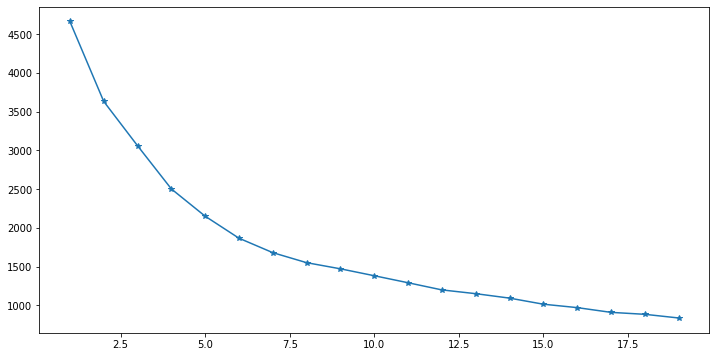

In [203]:
plt.figure(figsize=(12,6))
plt.plot(d['cluster'],d['cluster_error'],marker='*')

In [212]:
kmeans=KMeans(n_clusters=5)
kmeans.fit(X_sc)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [214]:
kmeans.labels_

array([3, 1, 1, 1, 1, 0, 3, 3, 0, 1, 1, 1, 1, 3, 1, 0, 0, 0, 3, 3, 1, 1,
       1, 1, 0, 4, 4, 4, 0, 3, 1, 1, 1, 3, 3, 0, 3, 2, 1, 0, 1, 1, 1, 1,
       3, 0, 0, 4, 3, 2, 3, 3, 0, 0, 1, 1, 0, 3, 1, 1, 3, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 3, 3, 3, 0, 1, 3, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0,
       3, 1, 0, 1, 1, 1, 1, 4, 4, 4, 2, 2, 1, 3, 0, 1, 1, 1, 1, 1, 1, 3,
       3, 1, 0, 4, 3, 0, 0, 0, 1, 3, 0, 0, 3, 1, 3, 1, 0, 0, 0, 1, 3, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 2, 3, 2, 1, 1, 3, 2, 0, 0, 0,
       1, 2, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 3, 1, 1, 1, 0, 1, 1, 1, 3,
       0, 2, 1, 1, 3, 0, 0, 0, 0, 4, 3, 3, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 3, 3, 0, 0, 0, 0, 1, 3, 1, 0, 3, 3, 0, 0, 1,
       3, 3, 1, 1, 1, 1, 0, 0, 0, 1, 1, 3, 3, 1, 1, 0, 0, 2, 2, 0, 0, 3,
       0, 0, 0, 3, 2, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 3, 1, 0, 0, 0, 0, 0,
       3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0,

# PCA

In [215]:
from sklearn.decomposition import PCA

In [224]:
pca=PCA()

In [225]:
pca.fit_transform(X_sc)

array([[-1.06766015, -0.33762743,  0.4062779 , ..., -0.69594849,
        -0.03047364,  0.01796347],
       [ 1.81631452, -1.43749141, -0.03292159, ..., -1.18556728,
        -0.05724185, -0.12305227],
       [ 0.96367643, -1.03239646,  0.17319532, ..., -1.08617824,
        -0.09172843, -0.19575998],
       ...,
       [-0.58157659, -0.1055048 ,  0.57974657, ..., -0.24112123,
        -0.03008483,  0.03965795],
       [-0.72196774,  0.39189345, -0.46251473, ...,  0.36616209,
         0.07591285,  0.01964575],
       [-1.04895592,  0.71502481, -0.67546518, ..., -0.85560375,
         0.09778759,  0.03183822]])

In [226]:
explaned_ratio=pca.explained_variance_ratio_

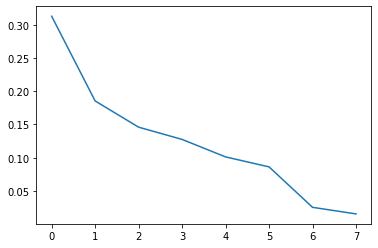

In [227]:
plt.plot(explaned_ratio)

In [229]:
pca=PCA(n_components=6)
X_pca=pca.fit_transform(X_sc)

In [234]:
results=[]
names = []
for name,k in models:
    kfold=KFold(shuffle=True,n_splits=3,random_state=0)
   
    cv_results=cross_val_score(k,X_pca,y,cv=kfold,scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name,np.mean(cv_results),np.var(cv_results,ddof=1)))

Logistic: 0.749500 (0.000374)
Navie: 0.707909 (0.003570)
KNN: 0.717043 (0.002822)
DT: 0.661609 (0.000432)
RF: 0.653009 (0.005366)
BG: 0.671505 (0.004204)
ADA: 0.695673 (0.000305)
ADAL: 0.748483 (0.000500)
St: 0.748440 (0.001349)


In [236]:
df3=pd.read_csv('indian_liver.csv')

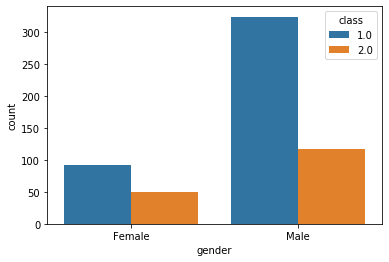

In [238]:
sns.countplot(df3['gender'],hue=df3['class'])
plt.savefig('EDA')